## Analyse (simulated) sensor data

### Setup

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = Path.cwd().parent / "data"

In [3]:
!ls $DATA_PATH

README_data.md
sensor_data_5e3cc355-cd2b-5e82-a83e-997111240bf7.csv
sensor_data_5e3cc355-cd2b-5e82-a83e-997111240bf7.parquet


## Custom functions

In [9]:
def plot_data_histogram(df, plot_column_name, normalise=True):
    plt.figure(figsize=(10, 6))
    plt.hist(df[plot_column_name], bins=10, color="blue", edgecolor="black", density=normalise)
    plt.title(f"Histogram of {plot_column_name}")
    plt.xlabel(f"{plot_column_name}")
    plt.ylabel("Frequency")
    plt.show()
    return None

In [26]:
def calc_summary_stats(df):
    display(df[["time_diff", "Sensor value"]].describe().transpose())

## Analyse Sensor Data

- Look at pulling the data from the parquet files and into DuckDB for analysis
- And/or use Polars for analysis
- And/or use Pandas for analysis

In [28]:
data_df = []
for csv_file in DATA_PATH.glob("*.csv"):
    print(f"Reading: {csv_file}")
    data_df.append(pd.read_csv(csv_file, date_format="%Y-%m-%d %H:%M:%S.%f", parse_dates=["Collection time"], index_col=0))

Reading: /Users/mjboothaus/code/github/databooth/cath-henshall/data/sensor_data_5e3cc355-cd2b-5e82-a83e-997111240bf7.csv
Reading: /Users/mjboothaus/code/github/databooth/cath-henshall/data/sensor_data_f651c3c1-5115-530b-8af4-0344c19429c3.csv


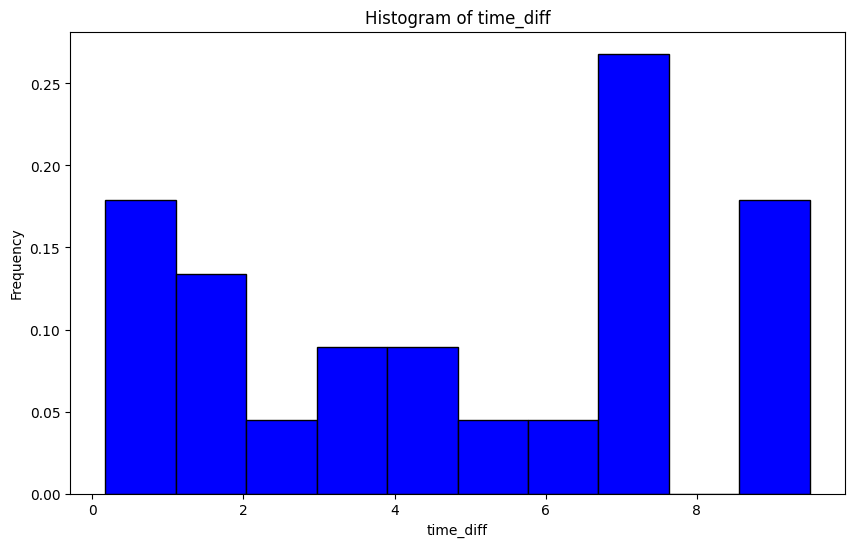

In [16]:
for df in data_df:
    calc_summary_stats(df)
    plot_data_histogram(df, "time_diff")

In [27]:
calc_summary_stats(data_df[0])

,count,mean,std,min,25%,50%,75%,max
time_diff,24.0,4.829526,3.099653,0.171642,1.835184,4.949772,7.203505,9.494257
Sensor value,25.0,50.938184,30.155788,0.266648,27.197680,47.204130,74.622226,98.054593
